#### 0722

Task1_0722. Adult Income 데이터셋을 이용한 전처리 및 분류 모델(소득이 50K 이상인지 예측)을 아래 설명을 참조하여 수행하세요.

[ 문제 설명 ]

- Adult Income 데이터셋을 로드합니다.
- 결측치를 처리합니다.
- 이상치를 제외합니다.
- 파생 변수를 작성합니다.
- 범주형 변수를 인코딩합니다.
- 변수 선택 및 독립변수 종속변수를 분리합니다.
- 데이터를 표준화합니다.
- 데이터셋을 학습용과 테스트용으로 나눕니다.
- Logistic Regression 모델 생성 및 학습합니다.
- 예측 및 평가합니다.

Adult Income 데이터셋(또는 "Census Income" 데이터셋)은 미국 인구 조사 데이터를 바탕으로 각 개인의 특성에 따른 소득 수준을 예측하는 데 사용됩니다. 이 데이터셋의 컬럼들은 다음과 같습니다:

- age: 나이 (숫자)
개인의 나이를 나타냅니다.
- workclass: 직업 유형 (범주형)
개인의 직업 유형을 나타냅니다. 예를 들어, 'Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov', 'Local-gov', 'State-gov', 'Without-pay', 'Never-worked' 등이 있습니다.
- fnlwgt: 최종 가중치 (숫자)
인구 조사에서 각 행이 전체 인구를 대표하는 비율을 나타내는 가중치입니다. 더 큰 값은 더 큰 대표성을 의미합니다.
- education: 교육 수준 (범주형)
개인의 교육 수준을 나타냅니다. 예를 들어, 'Bachelors', 'Some-college', '11th', 'HS-grad', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', '9th', '7th-8th', '12th', 'Masters', '1st-4th', '10th', 'Doctorate', '5th-6th', 'Preschool' 등이 있습니다.
- education-num: 교육 수준(숫자) (숫자)
교육 수준을 숫자로 나타낸 것입니다. 예를 들어, 'Bachelors'는 13, 'HS-grad'는 9 등으로 교육의 연수를 나타냅니다.
- marital-status: 결혼 상태 (범주형)
개인의 결혼 상태를 나타냅니다. 예를 들어, 'Married-civ-spouse', 'Divorced', 'Never-married', 'Separated', 'Widowed', 'Married-spouse-absent', 'Married-AF-spouse' 등이 있습니다.
- occupation: 직업 (범주형)
개인의 직업을 나타냅니다. 예를 들어, 'Tech-support', 'Craft-repair', 'Other-service', 'Sales', 'Exec-managerial', 'Prof-specialty', 'Handlers-cleaners', 'Machine-op-inspct', 'Adm-clerical', 'Farming-fishing', 'Transport-moving', 'Priv-house-serv', 'Protective-serv', 'Armed-Forces' 등이 있습니다.
- relationship: 가족 관계 (범주형)
개인의 가족 관계를 나타냅니다. 예를 들어, 'Wife', 'Own-child', 'Husband', 'Not-in-family', 'Other-relative', 'Unmarried' 등이 있습니다.
- race: 인종 (범주형)
개인의 인종을 나타냅니다. 예를 들어, 'White', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other', 'Black' 등이 있습니다.
- sex: 성별 (범주형)
개인의 성별을 나타냅니다. 'Male' 또는 'Female'입니다.
- capital-gain: 자본 이득 (숫자)
개인의 자본 이득을 나타냅니다. 자본 자산의 매매에서 발생하는 이익입니다.
- capital-loss: 자본 손실 (숫자)
개인의 자본 손실을 나타냅니다. 자본 자산의 매매에서 발생하는 손실입니다.
- hours-per-week: 주당 근무 시간 (숫자)
개인이 주당 일하는 시간을 나타냅니다.
- native-country: 출생 국가 (범주형)
개인의 출생 국가를 나타냅니다. 예를 들어, 'United-States', 'Cambodia', 'England', 'Puerto-Rico', 'Canada', 'Germany', 'Outlying-US(Guam-USVI-etc)', 'India', 'Japan', 'Greece', 'South', 'China', 'Cuba', 'Iran', 'Honduras', 'Philippines', 'Italy', 'Poland', 'Jamaica', 'Vietnam', 'Mexico', 'Portugal', 'Ireland', 'France', 'Dominican-Republic', 'Laos', 'Ecuador', 'Taiwan', 'Haiti', 'Columbia', 'Hungary', 'Guatemala', 'Nicaragua', 'Scotland', 'Thailand', 'Yugoslavia', 'El-Salvador', 'Trinadad&Tobago', 'Peru', 'Hong', 'Holand-Netherlands' 등이 있습니다.
- income: 소득 수준 (범주형)
개인의 소득 수준을 나타냅니다. ' <=50K' 또는 ' >50K'로, 연 소득이 50,000달러 이하인지 초과인지를 나타냅니다.

In [ ]:
# 1. 데이터 로드
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']
data = pd.read_csv(url, header=None, names=columns, na_values='?', skipinitialspace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
# 필요한 열 선택
select_data = data[['age','workclass','education-num','marital-status','occupation','relationship','sex','hours-per-week','income']]
select_data.head()

,age,workclass,education-num,marital-status,occupation,relationship,sex,hours-per-week,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,Male,40,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,Male,13,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,Male,40,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,40,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Female,40,<=50K


In [ ]:
# 결측치 처리
select_data['workclass'].fillna(select_data['workclass'].mode()[0], inplace = True)
select_data['occupation'].fillna(select_data['occupation'].mode()[0], inplace=True)
print(select_data.isnull().sum())

age               0
workclass         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
hours-per-week    0
income            0
dtype: int64


<ipython-input-168-22a5122f9d38>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_data['workclass'].fillna(select_data['workclass'].mode()[0], inplace = True)
<ipython-input-168-22a5122f9d38>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_data['occupation'].fillna(select_data['occupation'].mode()[0], inplace=True)


In [ ]:
select_data['income'] = select_data['income'].map({'<=50K':0,'>50K':1})
select_data['sex'] = select_data['sex'].map({'Male':0,'Female':1})

<ipython-input-170-e9f391160f88>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_data['income'] = select_data['income'].map({'<=50K':0,'>50K':1})
<ipython-input-170-e9f391160f88>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_data['sex'] = select_data['sex'].map({'Male':0,'Female':1})


<Axes: >

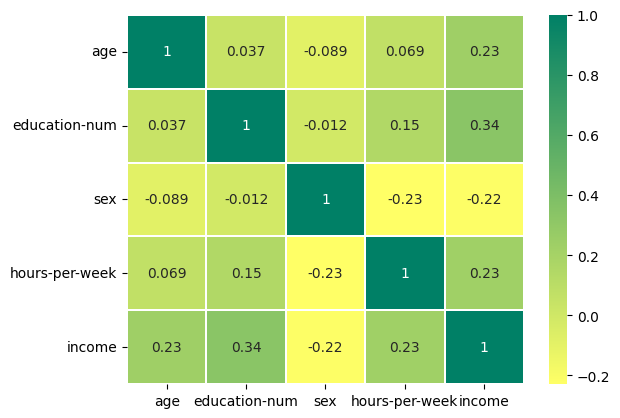

In [ ]:
sns.heatmap(select_data.select_dtypes(include='number').corr(), annot=True, cmap='summer_r', linewidths=0.2)

In [ ]:
# 반복문을 사용하여 범주형 변수를 더미 변수로 변환
for column in select_data.columns:
    # 첫 번재 카테고리는 drop_first=True로 열 제거
    select_data = pd.get_dummies(select_data, columns=[column], drop_first = True)

In [ ]:
# 타겟 변수와 피처 변수 설정
from sklearn.linear_model import LogisticRegression
X = select_data.drop('income_1', axis=1)
y = select_data['income_1']

# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)


# 성능 평가
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8377091969906341
Confusion Matrix:
 [[4563  379]
 [ 678  893]]
Classification Report:
               precision    recall  f1-score   support

       False       0.87      0.92      0.90      4942
        True       0.70      0.57      0.63      1571

    accuracy                           0.84      6513
   macro avg       0.79      0.75      0.76      6513
weighted avg       0.83      0.84      0.83      6513



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


QR 방법을 사용한 이상치 제거 가이드

IQR 계산
- IQR(Interquartile Range)은 데이터의 중앙 50%를 나타내며, 데이터의 변동성을 측정하는 데 사용됩니다. IQR은 3사분위수(Q3)와 1사분위수(Q1)의 차이로 계산됩니다.
  - Q1: 데이터의 25번째 백분위수(1사분위수)
  - Q3: 데이터의 75번째 백분위수(3사분위수)
  - IQR: Q3 - Q1

이상치 경계 계산
- 일반적으로 IQR의 1.5배를 사용하여 이상치 경계를 설정합니다.
  - Lower Bound: Q1 - 1.5 * IQR
  - Upper Bound: Q3 + 1.5 * IQR
- 이 경계를 벗어나는 데이터 포인트는 이상치로 간주됩니다.

이상치를 제거는 데이터의 분포를 왜곡하는 극단적인 값을 제거하여 데이터 분석 및 모델 성능을 향상시키는 데 도움이 됩니다. 도메인 지식과 데이터의 특성을 고려해서 이상치 제거를 진행합니다.

In [ ]:
#  데이터 로드
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']
data = pd.read_csv(url, header=None, names=columns, na_values='?', skipinitialspace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df = data.copy()

In [ ]:
df['income'] = df['income'].map({'<=50K':0,'>50K':1})
df['sex'] = df['sex'].map({'Male':0,'Female':1})

<Axes: >

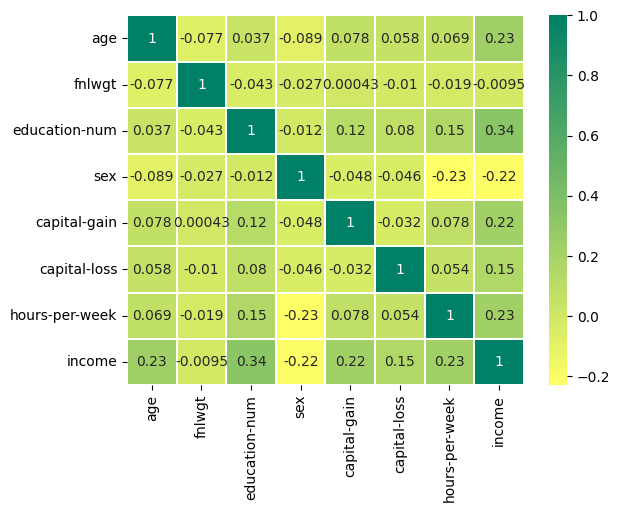

In [ ]:
import seaborn as sns
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='summer_r', linewidths=0.2)

In [ ]:
# 자본이득, 손실을 삭제하려고 했으나 상관계수가 높아 파생변수 생성
df['capital-diff'] = df['capital-gain'] - df['capital-loss']

<Axes: >

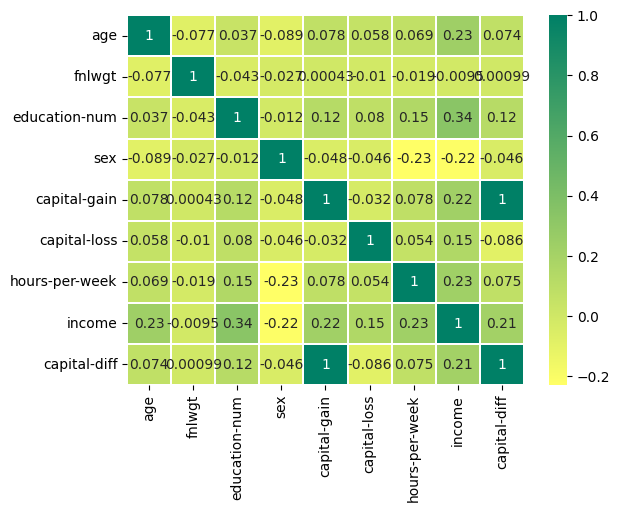

In [ ]:
import seaborn as sns
# 파생변수 또한 상관계수가 꽤 높음
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='summer_r', linewidths=0.2)

In [ ]:
# df.columns
# 불필요한 열 : education, fnlwgt, capital-gain, capital-loss, hours-per-week 삭제
df.drop(['education', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week'],axis=1,inplace=True)

In [ ]:
df.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,native-country,income,capital-diff
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,0,United-States,0,2174
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,0,United-States,0,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,0,United-States,0,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,United-States,0,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,Cuba,0,0


In [ ]:
df.isnull().sum()

age                  0
workclass         1836
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
native-country     583
income               0
capital-diff         0
dtype: int64

In [ ]:
# 결측치 제거
df['workclass'].fillna(df['workclass'].mode()[0], inplace = True)
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)
df['native-country'].fillna(df['native-country'].mode()[0], inplace=True)
print(df.isnull().sum())

age               0
workclass         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
native-country    0
income            0
capital-diff      0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education-num   32561 non-null  int64 
 3   marital-status  32561 non-null  object
 4   occupation      32561 non-null  object
 5   relationship    32561 non-null  object
 6   race            32561 non-null  object
 7   sex             32561 non-null  int64 
 8   native-country  32561 non-null  object
 9   income          32561 non-null  int64 
 10  capital-diff    32561 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 2.7+ MB


In [ ]:
# 범주형 변수 인코딩
for column in df.columns:
    # 첫 번재 카테고리는 drop_first=True로 열 제거
    df = pd.get_dummies(df, columns=[column], drop_first = True)

In [ ]:
# 타겟 변수와 피처 변수 설정
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
X = df.drop('income_1', axis=1)
y = df['income_1']

# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)


# 성능 평가
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8754798096115461
Confusion Matrix:
 [[4663  279]
 [ 532 1039]]
Classification Report:
               precision    recall  f1-score   support

       False       0.90      0.94      0.92      4942
        True       0.79      0.66      0.72      1571

    accuracy                           0.88      6513
   macro avg       0.84      0.80      0.82      6513
weighted avg       0.87      0.88      0.87      6513



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
